In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML

#instatiate variables
messageVolume = 100
garbageCollector = "EPSILON"
isMultiThreaded = 0
jeroRequestType = "JEROMQ"
jzmqRequestType = "JZMQ"
springAMQPRequestType = "SPRING AMQP"
rabbitClientRequestType = "RABBITMQ JAVA CLIENT"
bytesize = 10000

#load in profiling test results to dataframe
profiledData = pd.read_csv('profiling_test_results.csv', sep='\t')

In [172]:
meanDurationDict = {}
for requestType in [jeroRequestType, jzmqRequestType, springAMQPRequestType, rabbitClientRequestType]:
    # filter for library results with variables specified.
    filteredData = profiledData.query('REQUESTTYPE == @requestType and GARBAGECOLLECTOR == @garbageCollector and ISMULTITHREADED == @isMultiThreaded and MESSAGEVOLUME == @messageVolume and MESSAGESIZE == @bytesize') 
    finalFilteredData = filteredData[filteredData["RECEIVETIME"] != '\\N']

    # convert send and receive times to datetime format
    sendTime = pd.to_datetime(finalFilteredData["SENDTIME"])
    receiveTime = pd.to_datetime(finalFilteredData["RECEIVETIME"])

    # Get difference between send and receive times
    duration = receiveTime - sendTime

    # get mean time between send and receieve for library
    meanDuration = duration.mean()
    print(meanDuration)
    
    meanDurationDict.update({requestType : meanDuration})

0 days 00:00:00.038410
0 days 00:00:00.110181
0 days 00:00:00.195970
0 days 00:00:00.109420


In [173]:
# create new dataframe with all library mean time results for variables specified.
meanTimeData = [[jzmqRequestType, garbageCollector, isMultiThreaded, messageVolume, messageSize, meanDurationDict.get(jzmqRequestType)],
                [jeroRequestType, garbageCollector, isMultiThreaded, messageVolume, messageSize, meanDurationDict.get(jeroRequestType)], 
                [rabbitClientRequestType, garbageCollector, isMultiThreaded, messageVolume, messageSize, meanDurationDict.get(rabbitClientRequestType)], 
                [springAMQPRequestType, garbageCollector, isMultiThreaded, messageVolume, messageSize, meanDurationDict.get(springAMQPRequestType)] 
               ]
# display in table
meanDataframe = pd.DataFrame(meanTimeData, columns=["REQUEST TYPE", "GARBAGE COLLECTOR", "MULTITHREADED?", "MESSAGE VOLUME", "MESSAGE SIZE(bytes)", "MEAN SEND/RECEIVE DURATION"])
display(HTML(meanDataframe.to_html()))

,REQUEST TYPE,GARBAGE COLLECTOR,MULTITHREADED?,MESSAGE VOLUME,MESSAGE SIZE(bytes),MEAN SEND/RECEIVE DURATION
0,JZMQ,EPSILON,0,100,1000,00:00:00.110181
1,JEROMQ,EPSILON,0,100,1000,00:00:00.038410
2,RABBITMQ JAVA CLIENT,EPSILON,0,100,1000,00:00:00.109420
3,SPRING AMQP,EPSILON,0,100,1000,00:00:00.195970


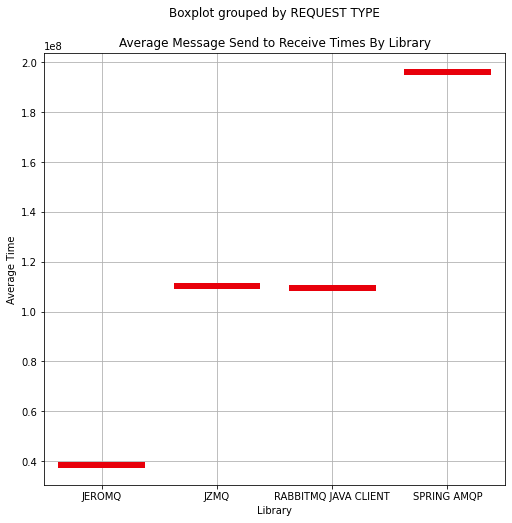

In [174]:
plt.style.use('seaborn-bright')

medianprops = {'linewidth': 6}
bplot = meanDataframe.boxplot(column='MEAN SEND/RECEIVE DURATION', by='REQUEST TYPE', 
                      widths = 0.7, figsize=(8,8), fontsize=10, medianprops=medianprops)

plt.xlabel('Library')
plt.ylabel('Average Time')
plt.title('Average Message Send to Receive Times By Library')
        
plt.show()